In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading Dataset

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Crop_recommendation (1).csv to Crop_recommendation (1).csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation (1).csv']))



In [7]:
print(df.head(15))

     N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5   69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6   69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7   94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8   89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9   68  58  38    23.223974  83.033227  6.336254  221.209196  rice
10  91  53  40    26.527235  81.417538  5.386168  264.614870  rice
11  90  46  42    23.978982  81.450616  7.502834  250.083234  rice
12  78  58  44    26.800796  80.886848  5.108682  284.436457  rice
13  93  56  36    24.014976  82.056872  6.984354  185.277339  

In [8]:
df.shape

(2200, 8)

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Corelation Heatmap

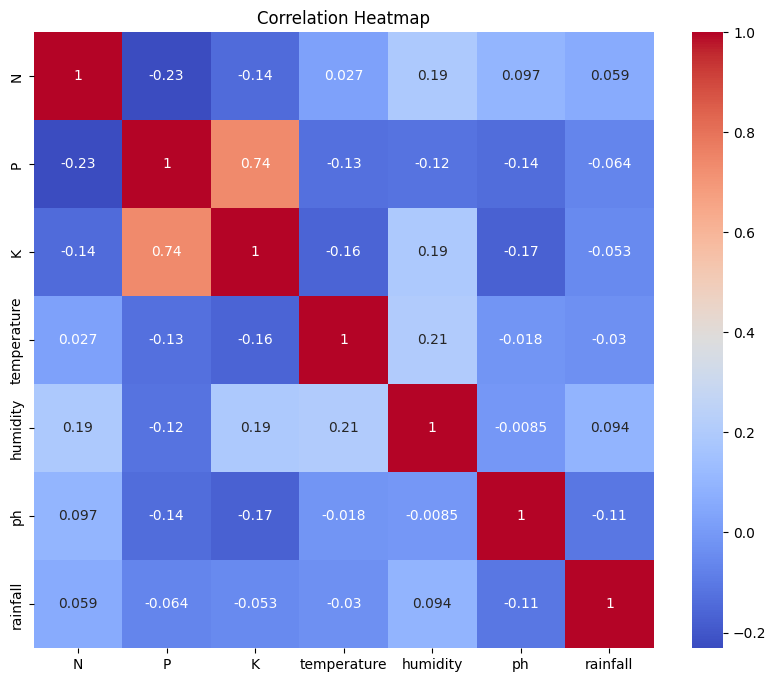

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Inter relation

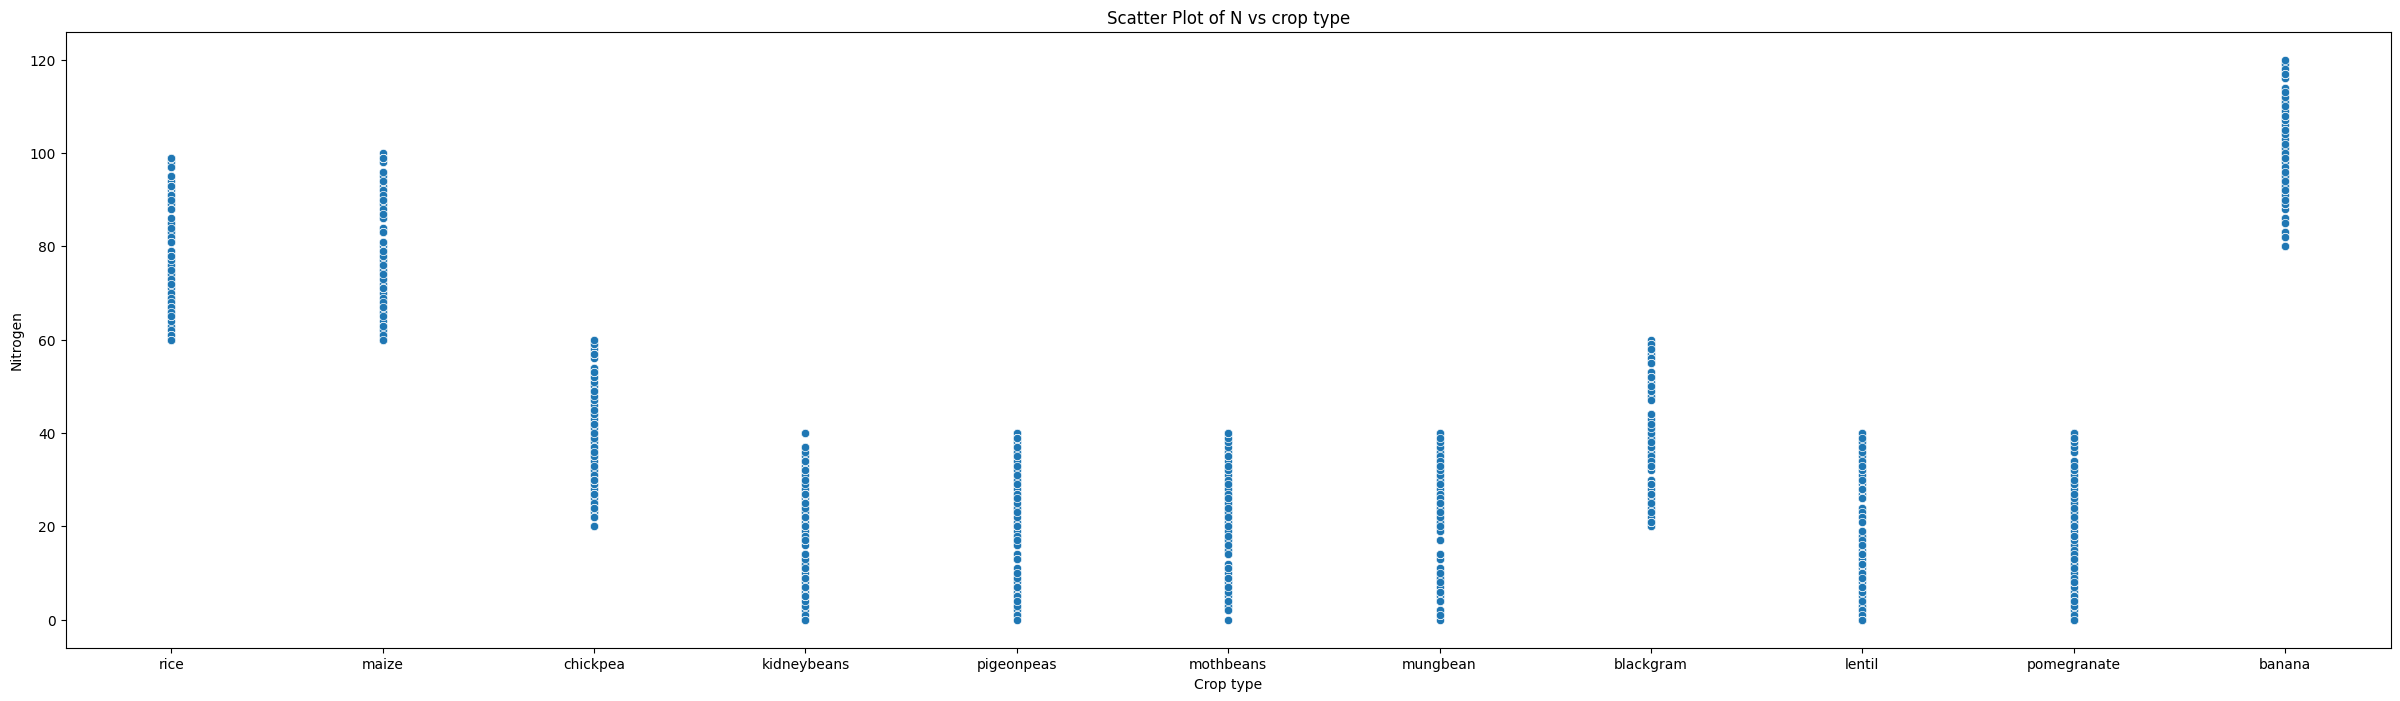

In [11]:
half1 = df.iloc[:len(df) // 2]

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='N', data=half1)
plt.title('Scatter Plot of N vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Nitrogen')
plt.show()




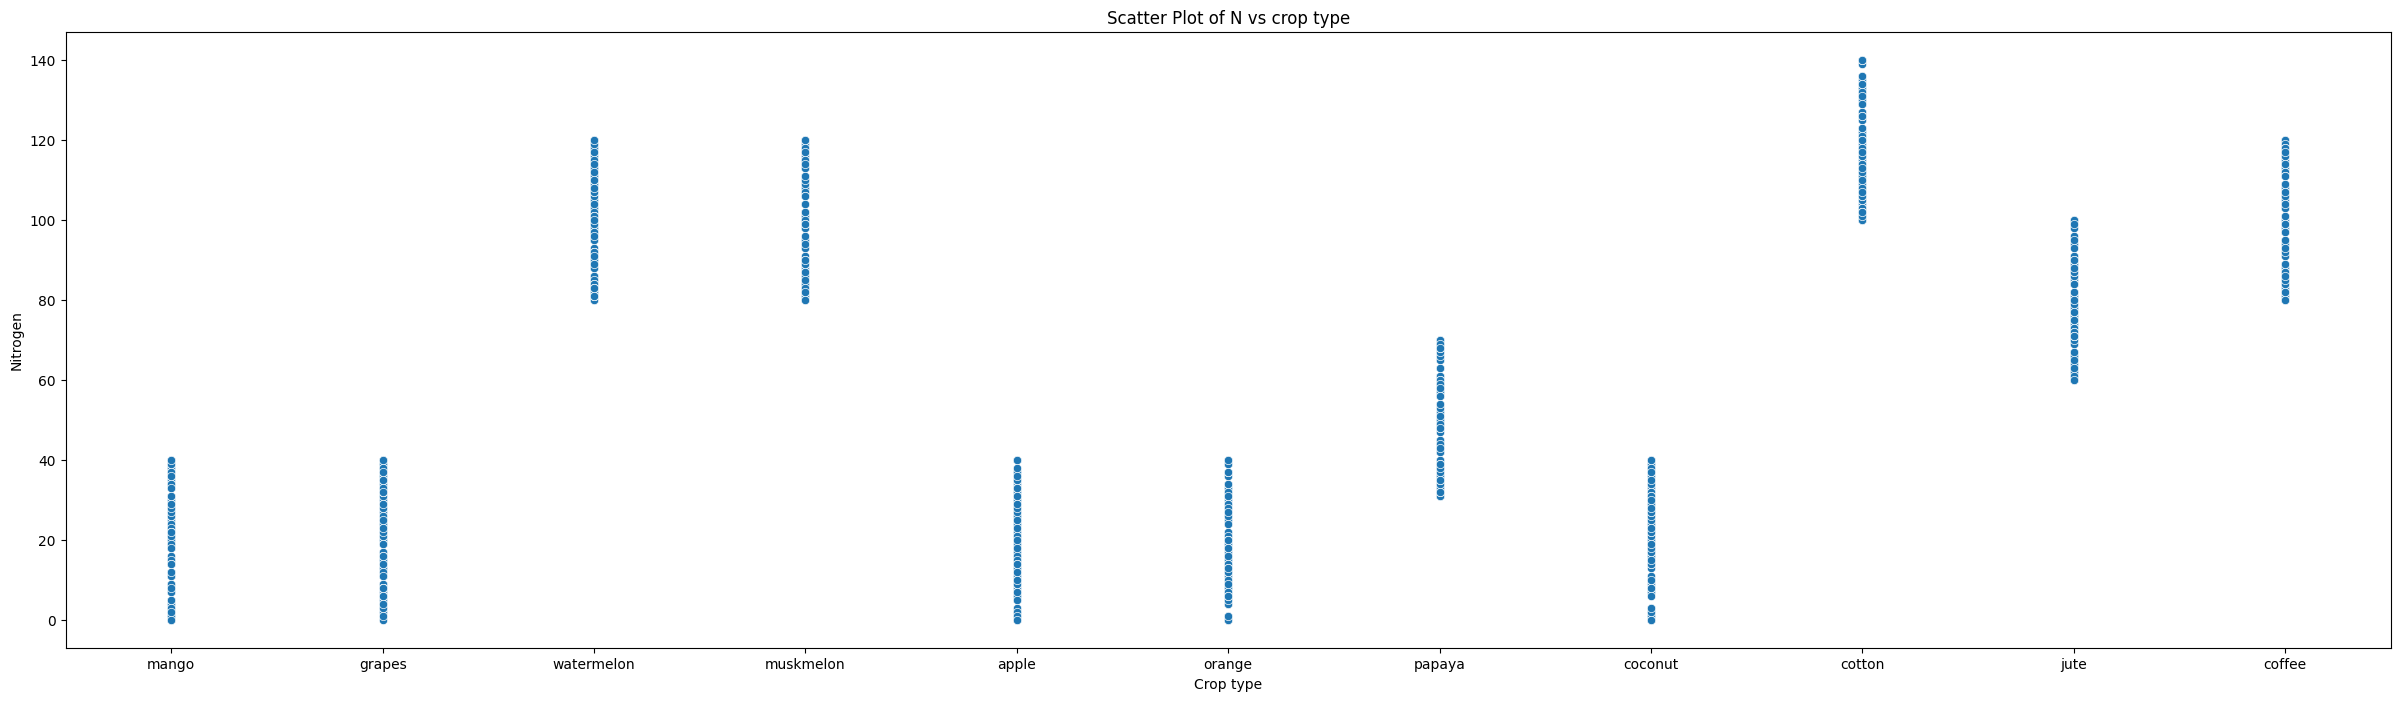

In [12]:
half2 = df.iloc[len(df) // 2:]
plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='N', data=half2)
plt.title('Scatter Plot of N vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Nitrogen')
plt.show()

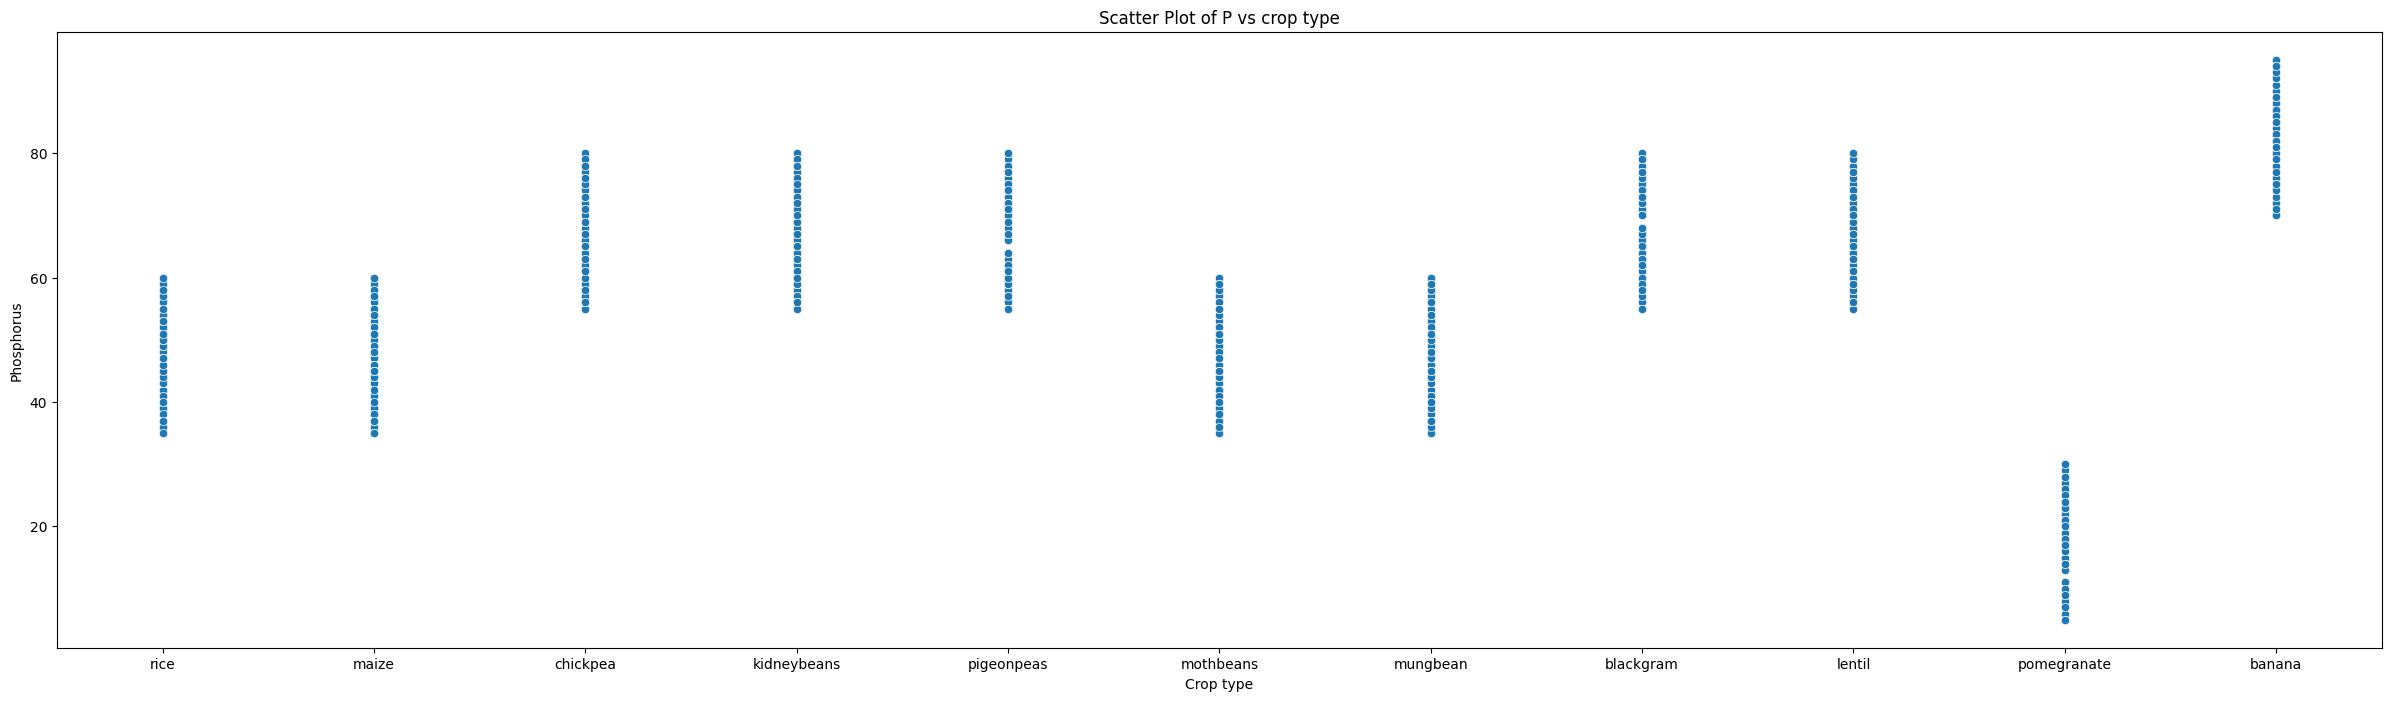

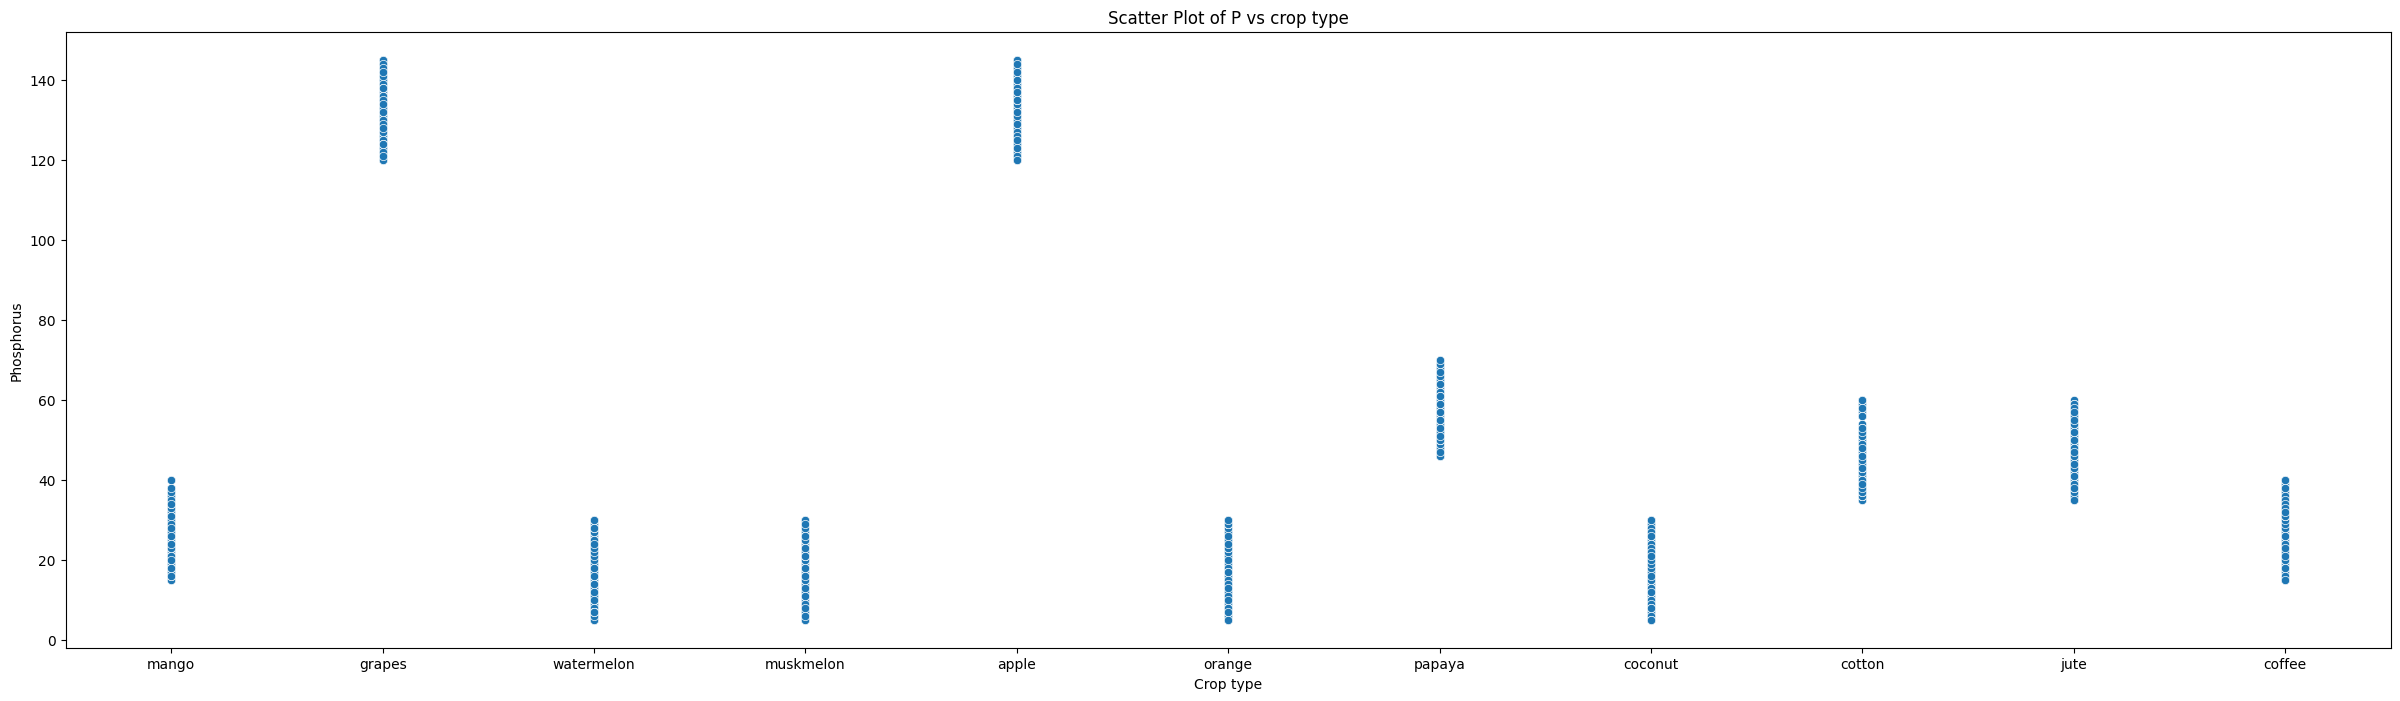

In [13]:
half1 = df.iloc[:len(df) // 2]
half2 = df.iloc[len(df) // 2:]

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='P', data=half1)
plt.title('Scatter Plot of P vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Phosphorus')
plt.show()

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='P', data=half2)
plt.title('Scatter Plot of P vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Phosphorus')
plt.show()

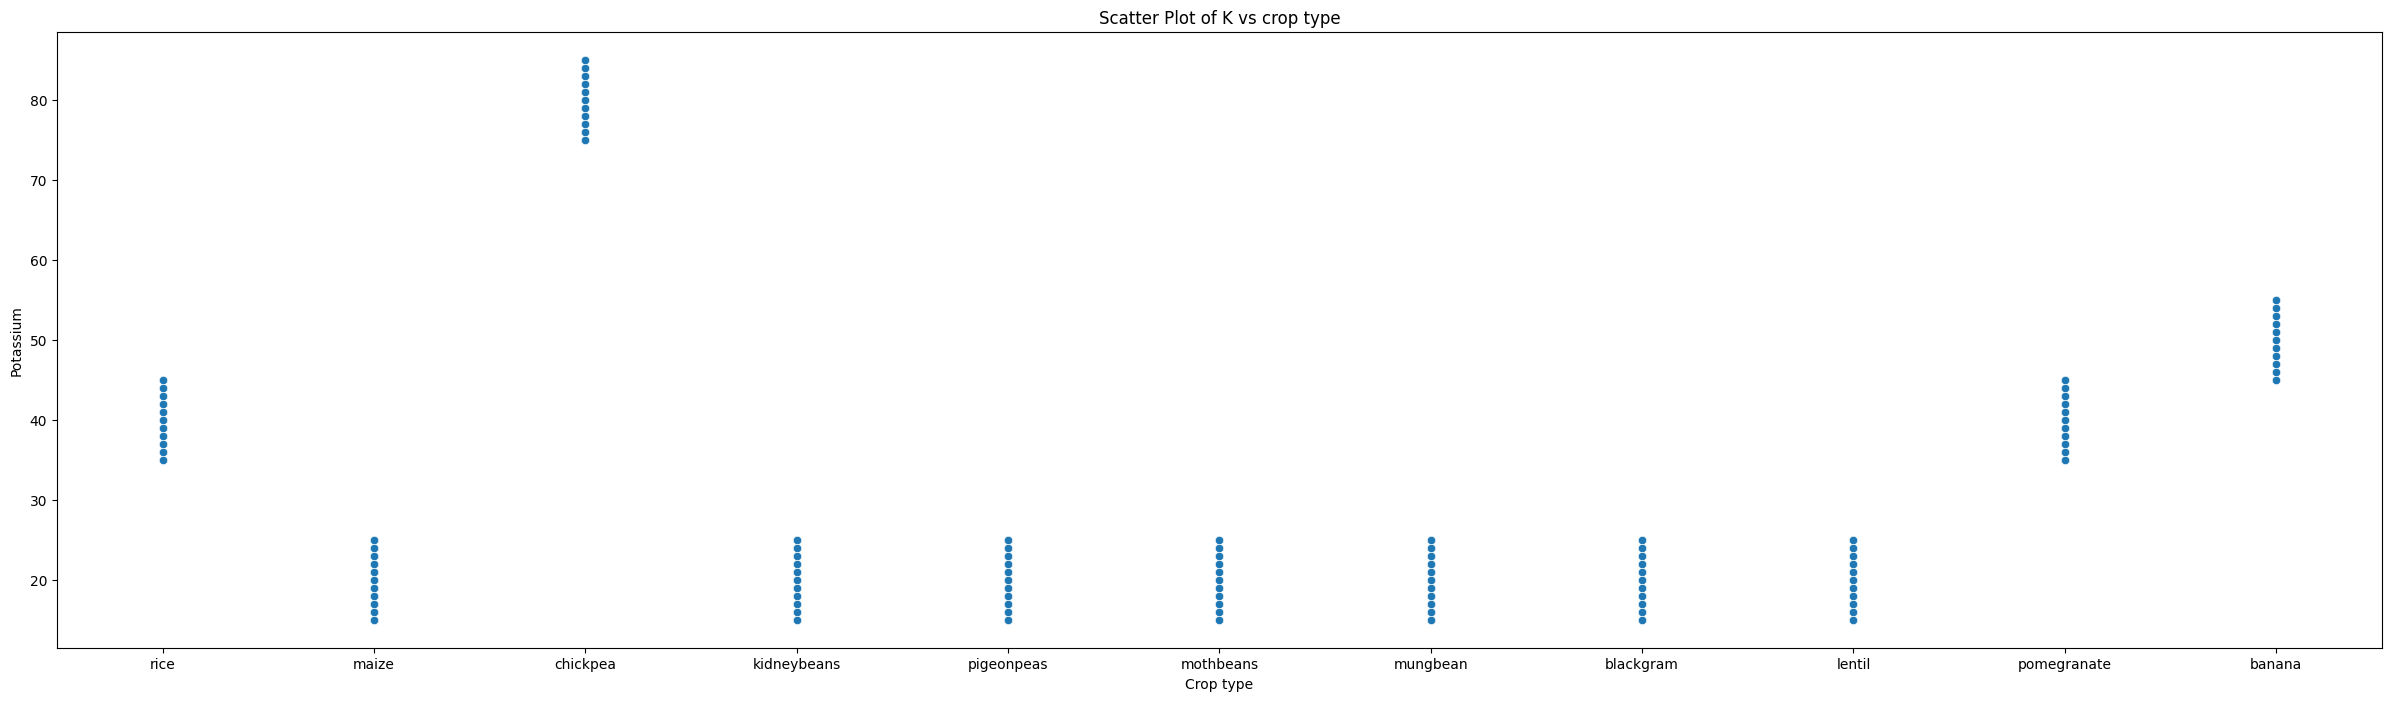

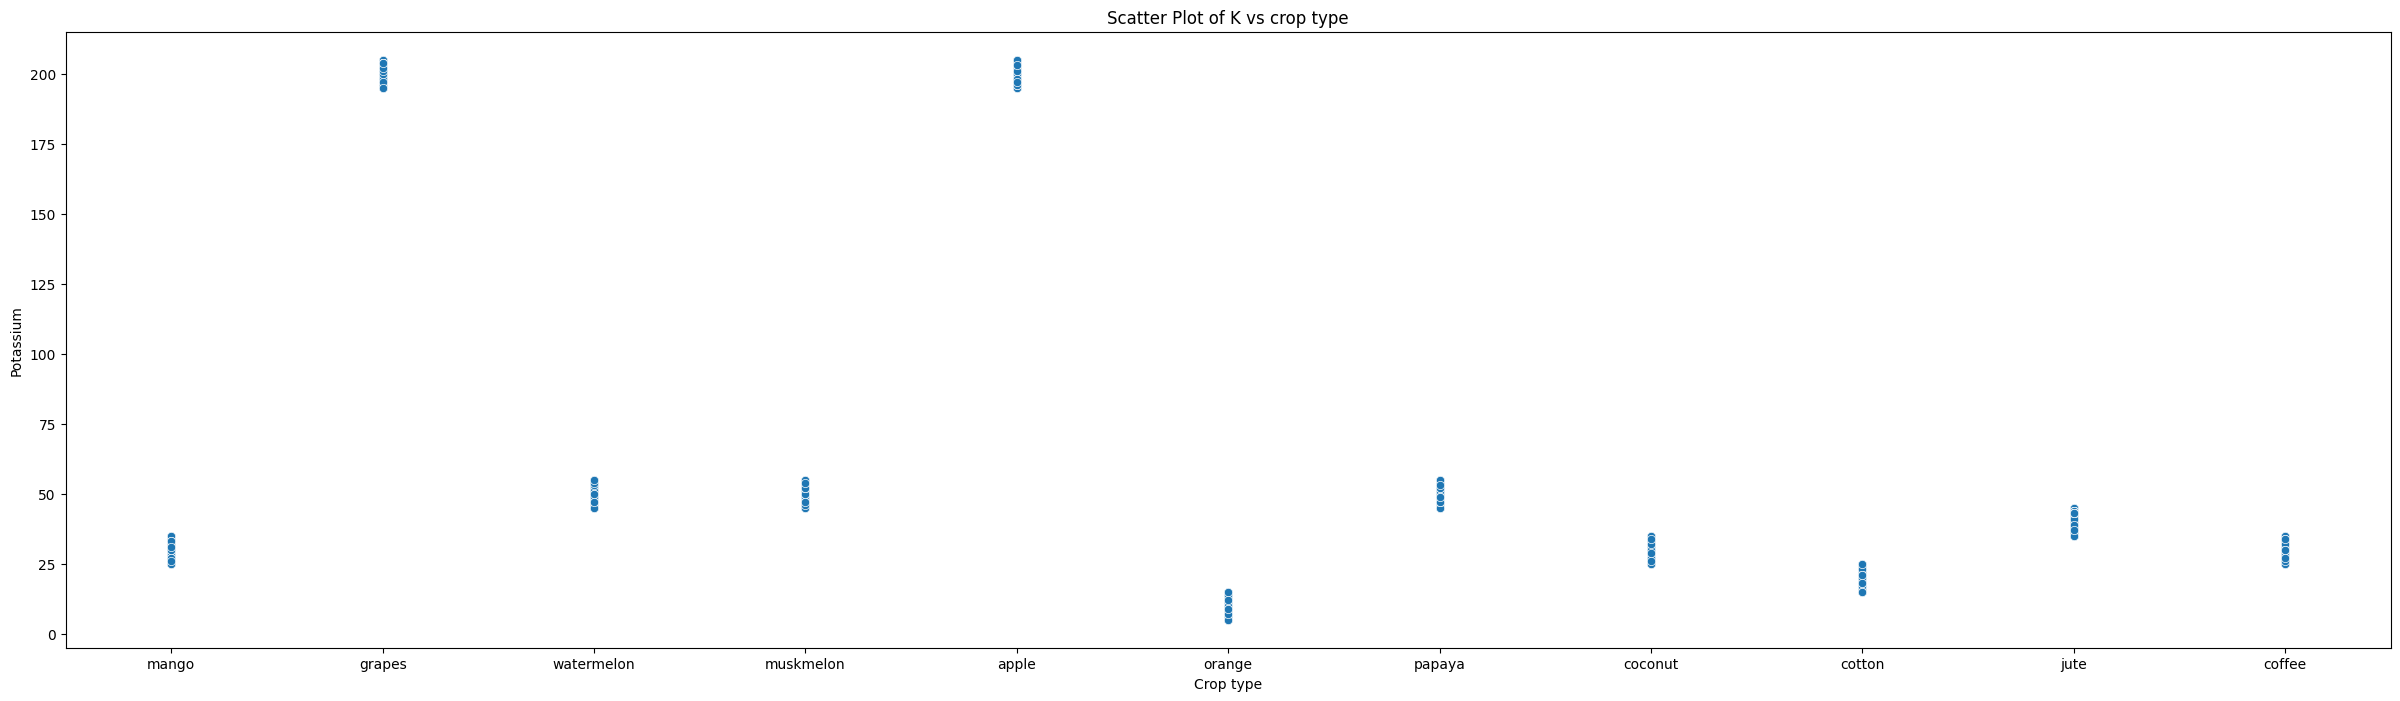

In [14]:
half1 = df.iloc[:len(df) // 2]
half2 = df.iloc[len(df) // 2:]
plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='K', data=half1)
plt.title('Scatter Plot of K vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Potassium')
plt.show()

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='K', data=half2)
plt.title('Scatter Plot of K vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Potassium')
plt.show()

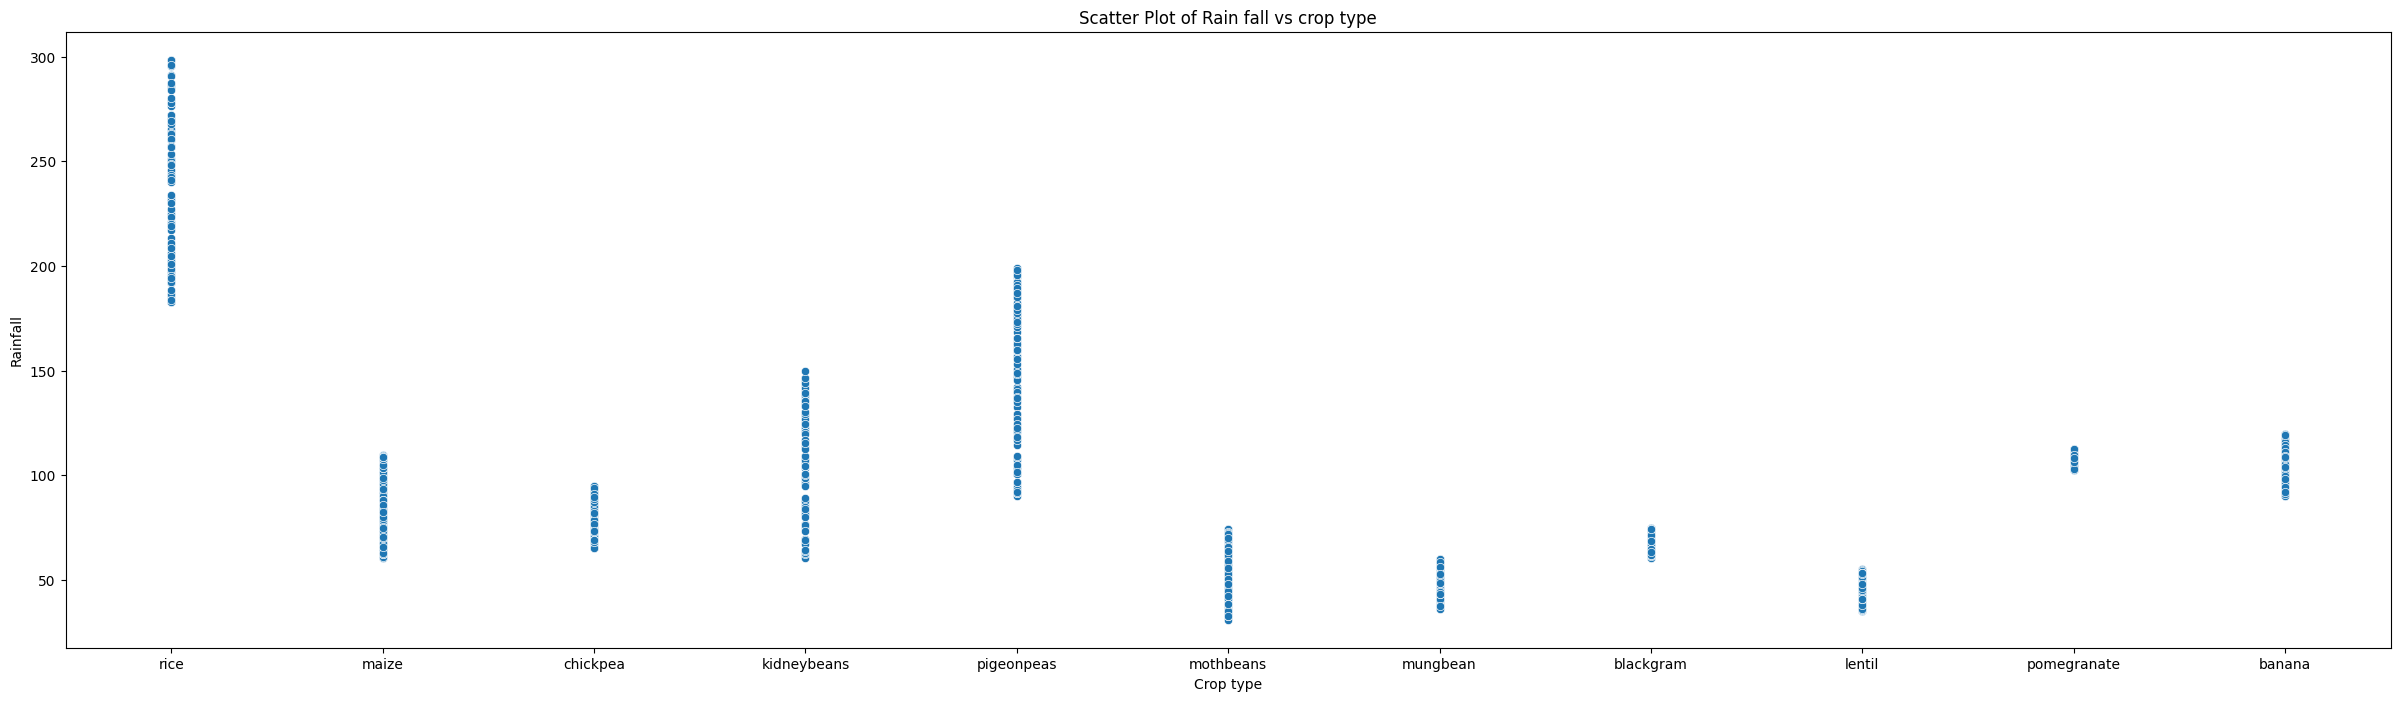

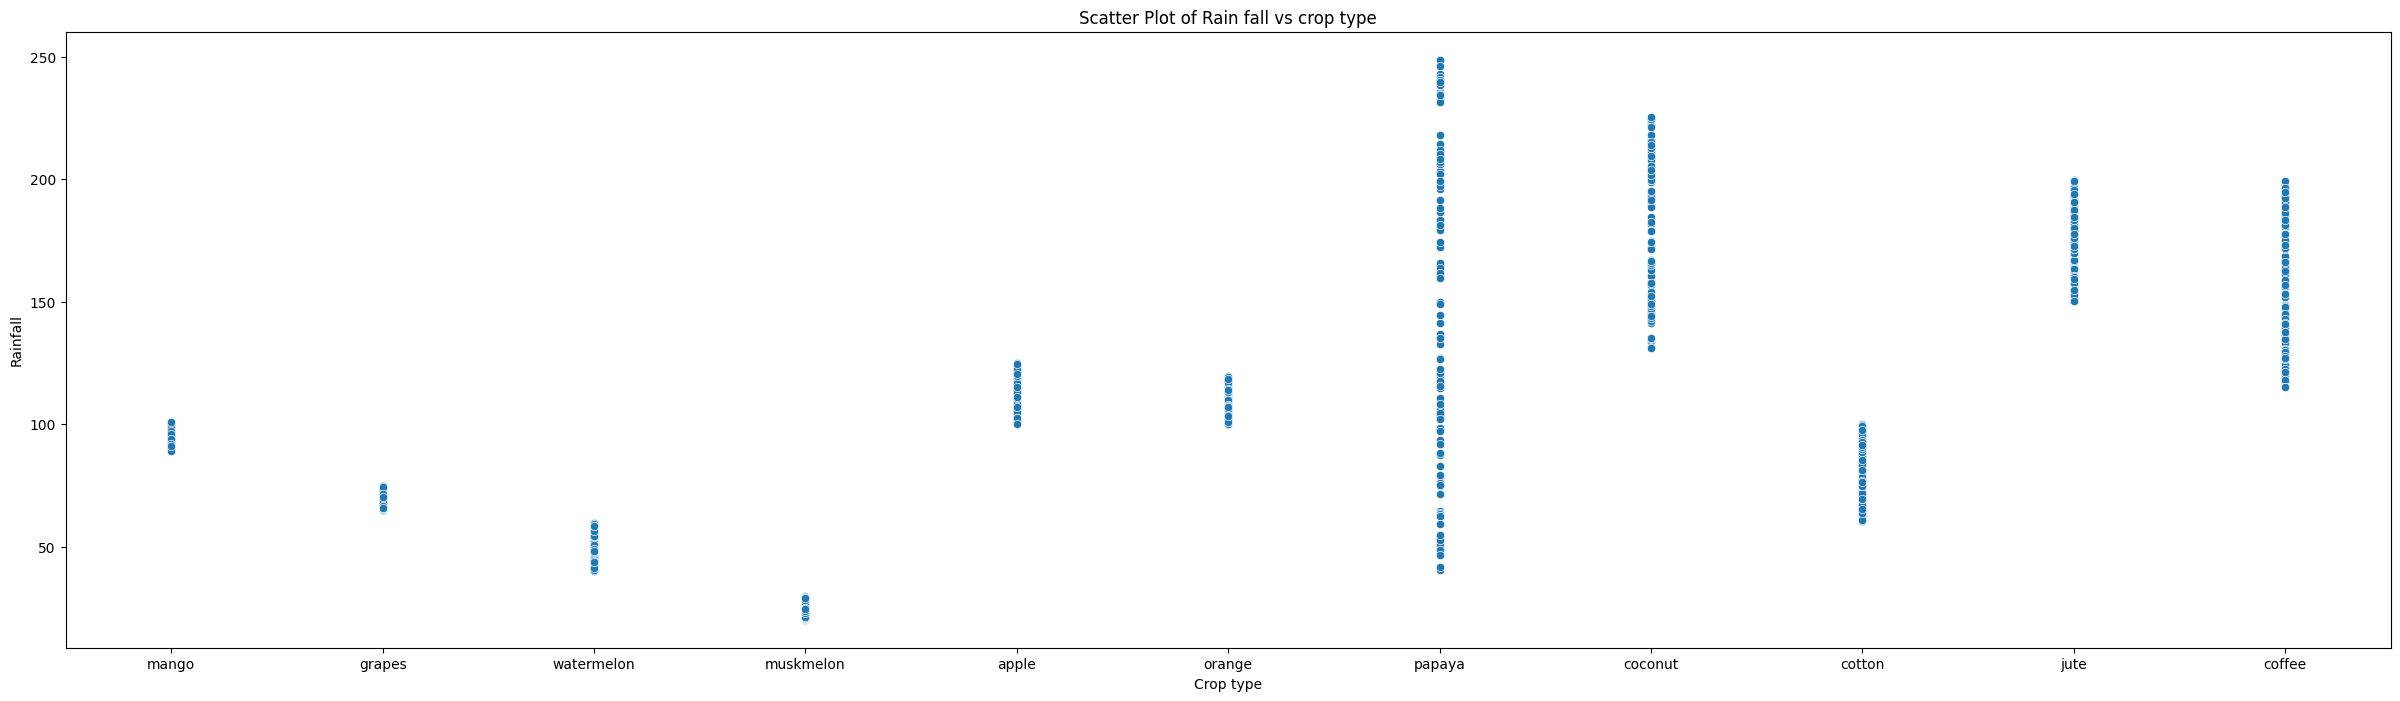

In [15]:
half1 = df.iloc[:len(df) // 2]
half2 = df.iloc[len(df) // 2:]

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='rainfall', data=half1)
plt.title('Scatter Plot of Rain fall vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Rainfall')
plt.show()

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='rainfall', data=half2)
plt.title('Scatter Plot of Rain fall vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Rainfall')
plt.show()

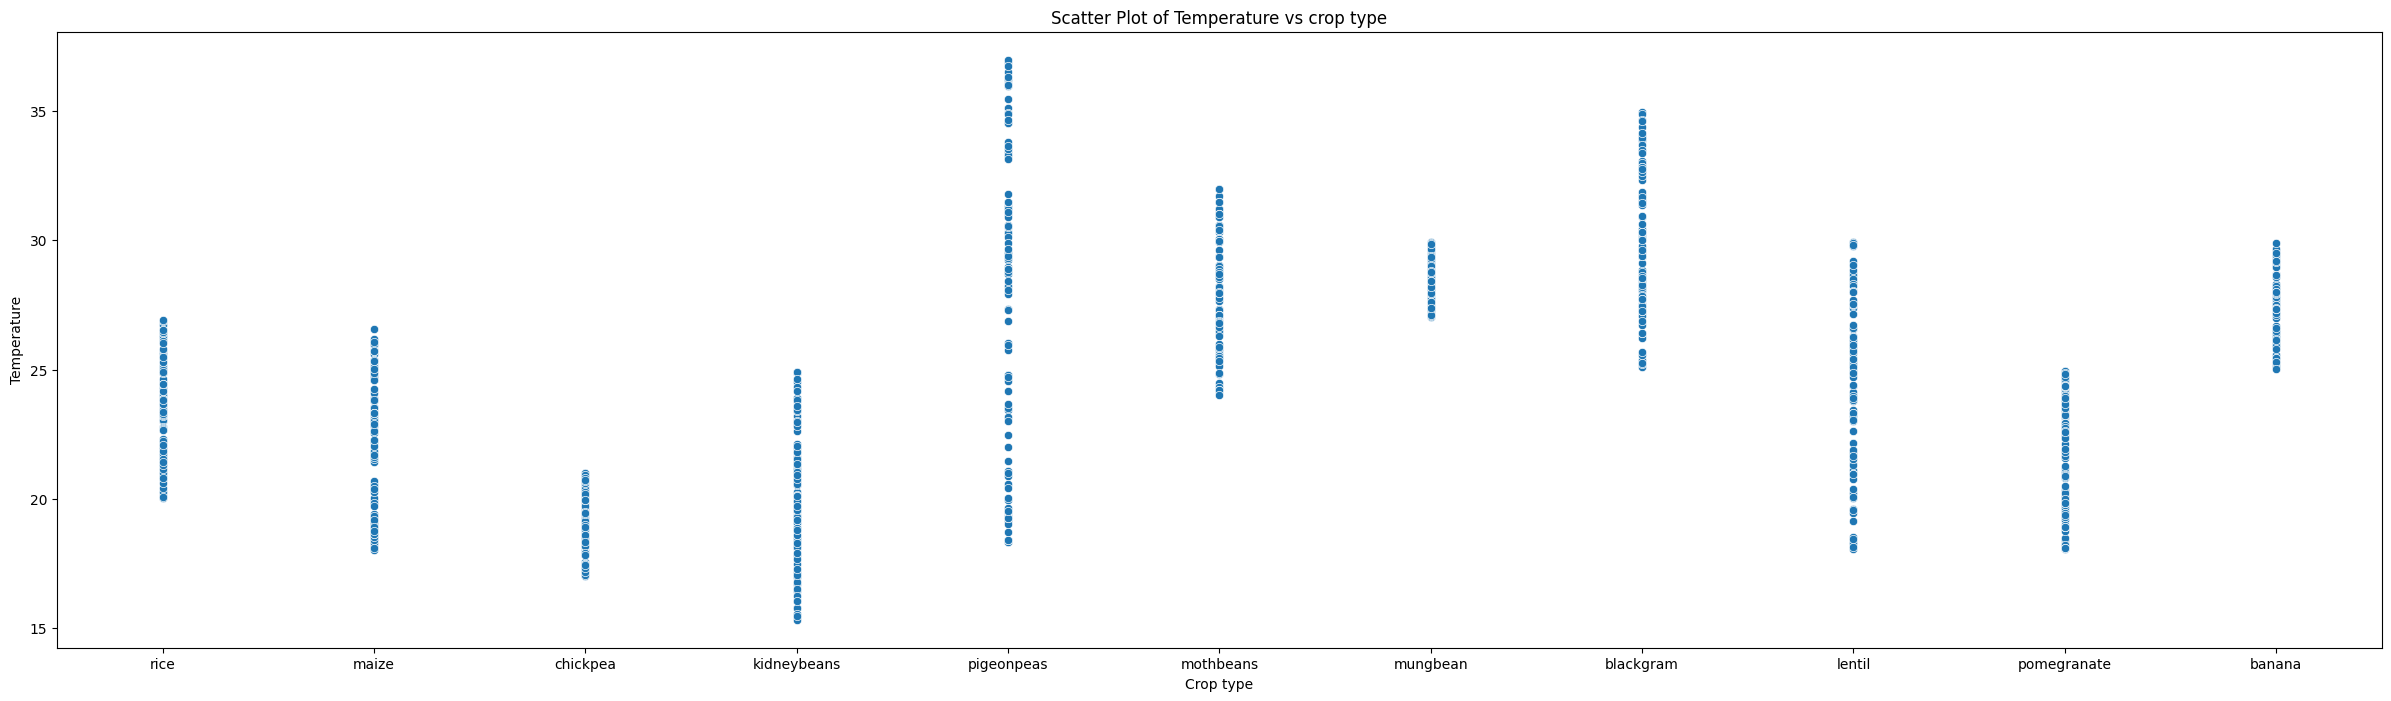

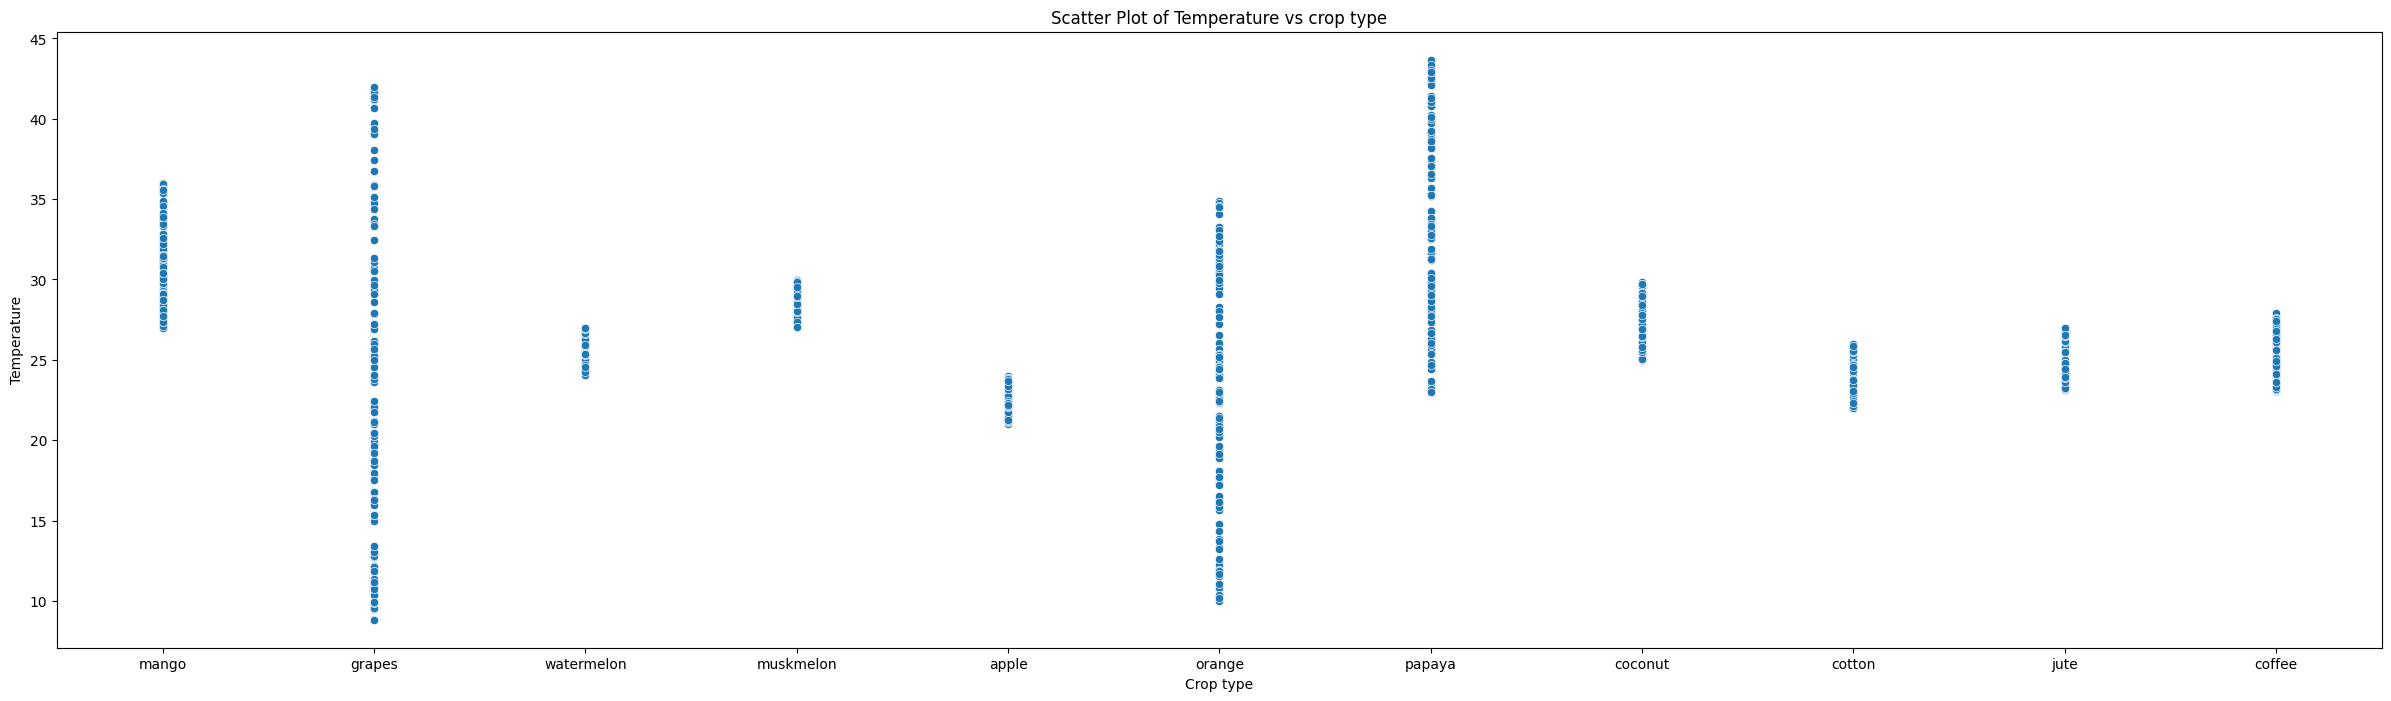

In [16]:
half1 = df.iloc[:len(df) // 2]
half2 = df.iloc[len(df) // 2:]

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='temperature', data=half1)
plt.title('Scatter Plot of Temperature vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(30, 8))
sns.scatterplot(x='label', y='temperature', data=half2)
plt.title('Scatter Plot of Temperature vs crop type')
plt.xlabel('Crop type')
plt.ylabel('Temperature')
plt.show()

Building a Crop Recommendation Model

In [17]:
# Splitting the data into features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



In [18]:
print("Accuracy of the model is :",accuracy*100,"%")

Accuracy of the model is : 99.0909090909091 %


In [19]:
print(classification_rep,end="\n")

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       1.00    